In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler as sc

pd.set_option('display.max_columns', None)

In [11]:
df = pd.read_csv("techSalaries2017.csv")
df.head()

,company,title,location,totalyearlycompensation,basesalary,stockgrantvalue,bonus,yearsofexperience,yearsatcompany,gender,Masters_Degree,Bachelors_Degree,Doctorate_Degree,Highschool,Some_College,Race_Asian,Race_White,Race_Two_Or_More,Race_Black,Race_Hispanic,Race,Education,Age,Height,Zodiac,SAT,GPA
0,Oracle,Product Manager,"Redwood City, CA",127000,107000,20000.0,10000.0,1.5,1.5,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,38,68.590,5,829,2.13
1,eBay,Software Engineer,"San Francisco, CA",100000,0,0.0,0.0,5.0,3.0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,34,68.059,7,993,2.77
2,Amazon,Product Manager,"Seattle, WA",310000,155000,0.0,0.0,8.0,0.0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,42,61.343,3,1200,3.26
3,Apple,Software Engineering Manager,"Sunnyvale, CA",372000,157000,180000.0,35000.0,7.0,5.0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,28,66.495,3,1170,3.07
4,Microsoft,Software Engineer,"Mountain View, CA",157000,0,0.0,0.0,5.0,3.0,NaN,0,0,0,0,0,0,0,0,0,0,NaN,NaN,34,69.015,2,1115,2.91


### QUESTION 1

In [12]:
# convert the problematic columns into categorical variables
dfQ1 = df.copy()
dfQ1['gender'] = dfQ1['gender'].replace({"Male":0, "Female":1, "Other":2, "Title: Senior Software Engineer":2})
dfQ1['Race'] = dfQ1['Race'].replace({"White":0, "Asian":1, "Black":2, "Two Or More":3, "Hispanic":4})
dfQ1['Education'] = dfQ1['Education'].replace({"PhD":0, "Master's Degree":1, "Bachelor's Degree":2, "Some College":3, "Highschool":4})

# make the string that we will unput into the OLS
predictors = [i for i in df.columns[7:] if i not in ['Race', 'Education', 'Some_College', 'Race_Two_Or_More'] ]
inputStringQ1 = "totalyearlycompensation ~ " + " + ".join(predictors)
inputStringQ1

'totalyearlycompensation ~ yearsofexperience + yearsatcompany + gender + Masters_Degree + Bachelors_Degree + Doctorate_Degree + Highschool + Race_Asian + Race_White + Race_Black + Race_Hispanic + Age + Height + Zodiac + SAT + GPA'

In [13]:
modelQ1 = ols(inputStringQ1, dfQ1).fit()
modelQ1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     totalyearlycompensation   R-squared:                       0.276
Model:                                 OLS   Adj. R-squared:                  0.276
Method:                      Least Squares   F-statistic:                     1028.
Date:                     Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                             23:53:40   Log-Likelihood:            -5.6329e+05
No. Observations:                    43102   AIC:                         1.127e+06
Df Residuals:                        43085   BIC:                         1.127e+06
Df Model:                               16                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -1.75e+05   1.39e+04    -12.594      0.000   -2.02e+05   -1.48e+05
yearsofexperience  9355.9221    136.278     68.653      0.000    9088.814    9623.030
yearsatcompany    -2528.5890    199.716    -12.661      0.000   -2920.036   -2137.141
gender            -1231.2115   1357.293     -0.907      0.364   -3891.533    1429.110
Masters_Degree      275.0361   1592.817      0.173      0.863   -2846.915    3396.987
Bachelors_Degree    -2.1e+04   1859.659    -11.295      0.000   -2.46e+04   -1.74e+04
Doctorate_Degree   7.091e+04   3146.331     22.538      0.000    6.47e+04    7.71e+04
Highschool        -3.223e+04   6732.546     -4.788      0.000   -4.54e+04    -1.9e+04
Race_Asian        -1.487e+04   1660.442     -8.954      0.000   -1.81e+04   -1.16e+04
Race_White        -1.385e+04   1846.591     -7.502      0.000   -1.75e+04   -1.02e+04
Race_Black        -1.847e+04   4582.438     -4.031      0.000   -2.75e+04   -9490.631
Race_Hispanic     -1.868e+04   3676.282     -5.081      0.000   -2.59e+04   -1.15e+04
Age                -128.6251     76.686     -1.677      0.093    -278.931      21.680
Height               -5.5250    183.832     -0.030      0.976    -365.838     354.788
Zodiac              216.4400    159.751      1.355      0.175     -96.675     529.555
SAT                 320.0518     11.499     27.832      0.000     297.513     342.591
GPA               -1532.3811   4859.275     -0.315      0.752   -1.11e+04    7991.891
==============================================================================
Omnibus:                    52530.246   Durbin-Watson:                   1.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         50982168.368
Skew:                           5.842   Prob(JB):                         0.00
Kurtosis:                     171.081   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# now let's conduct individual linear regressions
allR2 = dict()
for column in predictors:
    tempString = "totalyearlycompensation ~ " + column
    allR2[column] = ols(tempString, dfQ1).fit().rsquared

allR2df = pd.DataFrame(allR2.values(), columns=["R-Squared"], index=allR2.keys())
allR2df['R-Squared'] = [str(round(i*100,5))+"%" for i in allR2df['R-Squared']]
allR2df

,R-Squared
yearsofexperience,17.88268%
yearsatcompany,2.74904%
gender,0.12788%
Masters_Degree,0.03356%
Bachelors_Degree,1.95626%
Doctorate_Degree,0.94438%
Highschool,0.022%
Race_Asian,0.64115%
Race_White,0.0773%
Race_Black,0.07151%


## QUESTION 2

In [20]:
# split into training and test set
dfQ2 = dfQ1.dropna()
X = dfQ2[predictors].to_numpy()
Y = dfQ2[['totalyearlycompensation']].to_numpy()

X = sc().fit_transform(X)

xTrain, xTest, yTrain, yTest = train_test_split(X, Y.reshape(-1,1), test_size=0.2, random_state=0)
print("Training set shape:", xTrain.shape)
print("Test set shape:", xTest.shape)

Training set shape: (17271, 16)
Test set shape: (4318, 16)


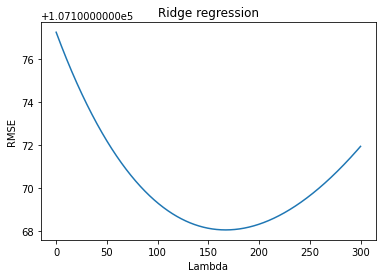

Optimal lambda: 167.1


In [22]:
lambdas = np.linspace(0,300,2001)
cont = np.empty([len(lambdas),2])*np.NaN 

for ii in range(len(lambdas)):
    ridgeModel = Ridge(alpha=lambdas[ii]).fit(xTrain, yTrain)
    cont[ii,0] = lambdas[ii]
    error = mean_squared_error(yTest,ridgeModel.predict(xTest),squared=False)
    cont[ii,1] = error

plt.plot(cont[:,0],cont[:,1])
plt.xlabel('Lambda')
plt.ylabel('RMSE')
plt.title('Ridge regression')
plt.show()
print('Optimal lambda:',lambdas[np.argmax(cont[:,1]==np.min(cont[:,1]))])